## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [18]:
# Combine the data into a single dataset
SingleData=pd.merge(study_results,mouse_metadata,how='left',on="Mouse ID")
SingleData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
#Checking the dataset
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [20]:
#Checking the dataset
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [21]:
SingleData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Checking the number of mice in the DataFrame.
NumbersMice=len(SingleData['Mouse ID'])
NumbersMice

1893

In [7]:
NumberUniqueMice=len(SingleData['Mouse ID'].unique())
NumberUniqueMice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  
#MouseTimepoint=SingleData.loc('Mouse ID','Timepoint')   
#MouseTimepoint.head()
SingleData[['Mouse ID','Timepoint']]

,Mouse ID,Timepoint
0,b128,0
1,f932,0
2,g107,0
3,a457,0
4,c819,0
...,...,...
1888,r944,45
1889,u364,45
1890,p438,45
1891,x773,45


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
DuplicatedMouse=SingleData.loc[SingleData[['Mouse ID','Timepoint']].duplicated(),"Mouse ID"]
DuplicatedMouse.head()


137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
CleanData=SingleData.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='last')
#CleanData.head()
#len(CleanData)
CleanDataDF=pd.DataFrame(CleanData)
CleanDataDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Checking the number of mice in the clean DataFrame.
NumberM=len(CleanDataDF['Mouse ID'])
NumberM


1888

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#First Groupd by Drug Regimen all
DrugRegimenGroup=CleanDataDF.groupby(['Drug Regimen'])
#DrugRegimenGroup
#Doing statistics:   mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen using DrugRegimenGroup
DrugRegimenMean=DrugRegimenGroup['Tumor Volume (mm3)'].mean()
#DrugRegimenMean
DrugRegimenMedian=DrugRegimenGroup['Tumor Volume (mm3)'].median()
#DrugRegimenMedian
DrugRegimenVar=DrugRegimenGroup['Tumor Volume (mm3)'].var()
#DrugRegimenVar
DrugRegimenStd=DrugRegimenGroup['Tumor Volume (mm3)'].std()
#DrugRegimenStd
DrugRegimenSem=DrugRegimenGroup['Tumor Volume (mm3)'].sem()
DrugRegimenSem

#Complete Summary Statistics
SummaryStatisticsDrugRegimen=pd.DataFrame({"Mean": DrugRegimenMean,"Median": DrugRegimenMedian,"Variance": DrugRegimenVar,
                                           "Standar Deviation": DrugRegimenStd,"SEM":DrugRegimenSem})
SummaryStatisticsDrugRegimen

,Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Task Repeated

## Bar Plots

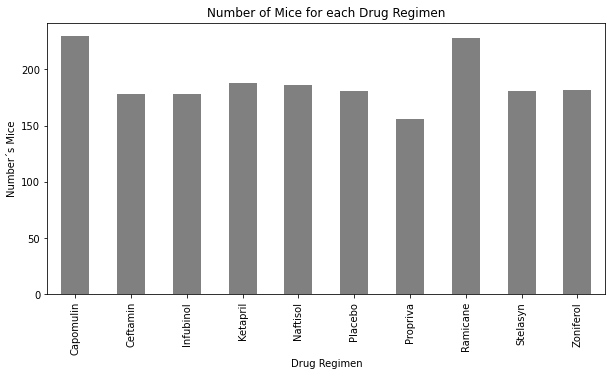

In [24]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#Number of mice for each Regimen Drug, Drug Regimen/Mouse ID
DrugRegimenMice=CleanDataDF.groupby(['Drug Regimen']).count()['Mouse ID']
#Bar Plot 
DrugRegimenMice.plot(kind="bar",figsize=(10,5),color='Gray')
plt.title("Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number´s Mice")
plt.show()


Text(0, 0.5, 'Number´s Mice')

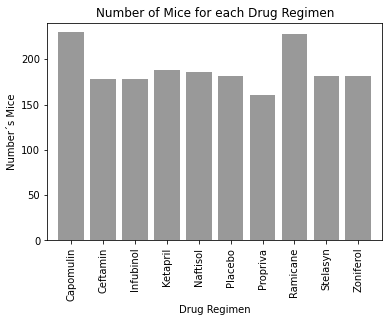

In [25]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# Defining the x_axis
x_axis=np.arange(len(DrugRegimenMice))
#Number´s Mice
#Create an arraw with the datapoints
#numbers=pd.Series(DrugRegimenMice('Mouse ID')).values
NumbersM = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
#Bar Plot
plt.bar(x_axis, NumbersM, color='Gray', alpha=0.80, align='center') #check **** tick and color
tick_locations = [value for value in x_axis]
#Drugs Regimens
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(NumbersM)+10)
plt.title("Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number´s Mice")

## Pie Plots

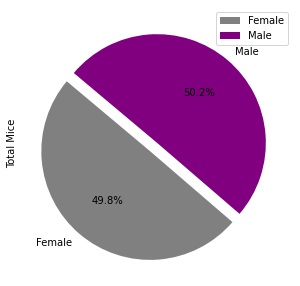

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Get the numbers for pie plot gender group by Mouse ID y Sex
GenderDataMice=CleanDataDF.groupby(['Mouse ID','Sex'])
#GenderDataMice 
#dataFrames
MiceGenderDF=pd.DataFrame(GenderDataMice.size())
MiceGenderDF=pd.DataFrame(MiceGenderDF.groupby(['Sex']).count())
MiceGenderDF.columns=["Total Mice"]
#Percentage por pie plot
MiceGenderDF["Percentage Sex"]=(MiceGenderDF/MiceGenderDF["Total Mice"].sum()*100)
MiceGenderDF["Percentage Sex"]=MiceGenderDF["Percentage Sex"]
#Pie Plot
plot = MiceGenderDF.plot.pie(y='Total Mice',figsize=(5,5), colors =  ['Gray', 'Purple'] , startangle=140, explode = (0.1, 0), autopct="%1.1f%%")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

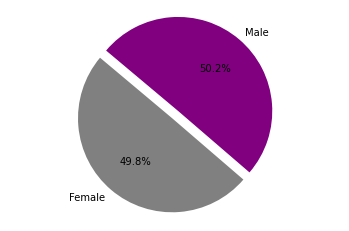

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]
#List the values of each section of the pie chart
percentages = [49.799197,50.200803]
#Doing the pie chart 
plt.pie(percentages,explode = (0.1, 0), labels=labels,colors = ['Gray', 'Purple'], autopct="%1.1f%%", startangle=140)
#Set axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Most Promising Regimens
MostPromisingRegimens=CleanDataDF[CleanDataDF["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
MostPromisingRegimens=MostPromisingRegimens.sort_values(["Timepoint"], ascending=True)
MostPromisingRegimens
MostPromisingRegimensT=MostPromisingRegimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
MostPromisingRegimensT

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
221,Ceftamin,q483,0,45.000000
220,Ceftamin,o287,0,45.000000
219,Ceftamin,b487,0,45.000000
218,Ceftamin,p438,0,45.000000
...,...,...,...,...
1802,Infubinol,e476,45,62.435404
1804,Infubinol,a203,45,67.973419
1806,Infubinol,f345,45,60.918767
1810,Ceftamin,l471,45,67.748662


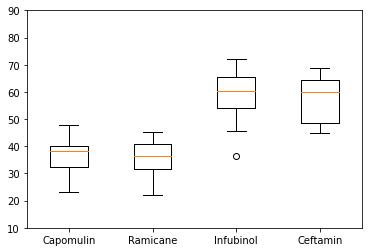

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
MPRGroup= MostPromisingRegimensT.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
MPRGroup.head()
# Turn retrieved data into dataframe to easily manipulate
MostPromisingRegimensDF = MPRGroup.to_frame()
MostPromisingRegimensDF
#Create a list to use as labels and dataframe
DrugRegimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
FinalRegimens = MostPromisingRegimensDF.reset_index()
TumorVolumes = FinalRegimens.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
TumorVolumesDF = pd.DataFrame(TumorVolumes)
TumorVolumesDF = TumorVolumesDF.reindex(DrugRegimen)
TumorVolumesMost = [vol for vol in TumorVolumesDF['Tumor Volume (mm3)']]
#Boxplot
plt.boxplot(TumorVolumesMost, labels=DrugRegimen)
plt.ylim(10, 90)
plt.show()

## Line and Scatter Plots

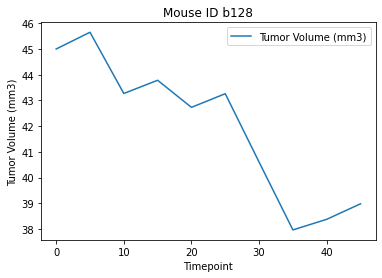

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Timepoint Vs Tumor Volume Mouse ID selected treated with Capomulin b128 

#CapomulinGrouped= CleanDataDF.loc[CleanDataDF['Drug Regimen']=='Capomulin']
#Change using Query  all data using Capomulin then just choose one ID mouse  
CapomulinGrouped=CleanDataDF.query("`Drug Regimen`=='Capomulin'")
CapomulinB128=CapomulinGrouped.query("`Mouse ID`=='b128'")
CapomulinB128=CapomulinB128[["Timepoint", "Tumor Volume (mm3)"]]
#print and plot
CapomulinB128=CapomulinB128.set_index("Timepoint")
CapomulinB128.plot()
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse ID b128")
plt.show()

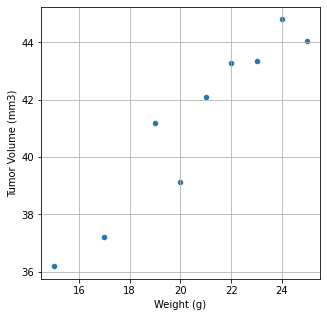

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Average, check Capomulin Drug Regimen
CapomulinDrugRegimen = CleanDataDF[CleanDataDF["Drug Regimen"].isin(["Capomulin"])]
#Introduce Weight
CapomulinDrugRegimenTV = MostPromisingRegimens[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
CapomulinData = CapomulinDrugRegimen.reset_index()
#Weight and Tumor Volume
CapomulinWeightTumorVolume = CapomulinData.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
#Doing the DataFrame por the Drug Remimen "Capomulin"
CapomulinDF = pd.DataFrame(CapomulinWeightTumorVolume).reset_index()
CapomulinScatter = CapomulinDF.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (5,5))



## Correlation and Regression

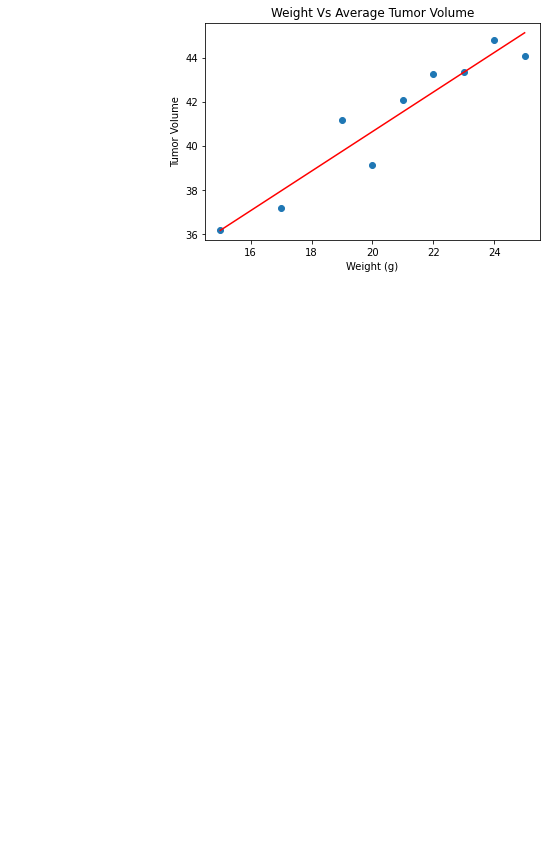

In [36]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#Obtein the data for model
x_values = CapomulinDF["Weight (g)"]
y_values = CapomulinDF["Tumor Volume (mm3)"]
#Perform the linear regression
(slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the data along 
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(8,8),fontsize=25)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs Average Tumor Volume")
plt.show()

*****************************************************************************************